In [213]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm

In [214]:
dt = 0.1
D = 1.0
L = 11.0
xl = 5.0
xr = 6.0
N = 32
length = 10000

In [215]:
# generate steps for all particles
steps=np.random.normal(loc=0.0, scale=2*D*dt, size=(N,length))

In [216]:
# initial positions
x = L*np.random.random(size=(N,))

In [217]:
# put initial position in front
x = np.column_stack((x, steps))

In [218]:
# calculate paths
paths = np.mod(np.cumsum(x, axis=1),L)

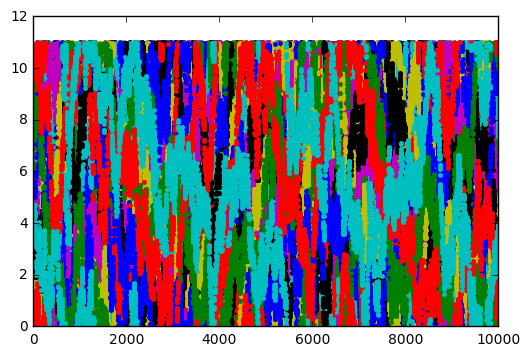

In [219]:
for path in paths:
    plt.plot(path,".")

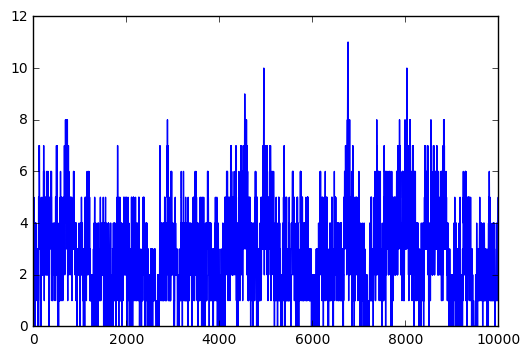

In [220]:
# plot the number of particles in between xl and xr
inbox = np.logical_and(xl<paths,paths<xr)
intensity = np.sum(inbox, axis=0)
plt.plot(intensity)

In [221]:
# place a Gaussian illumination at x=5.5 with unit variance
from scipy.stats import norm
intensity = norm.pdf(paths, loc=5.5)
intensity = np.sum(intensity, axis=0)

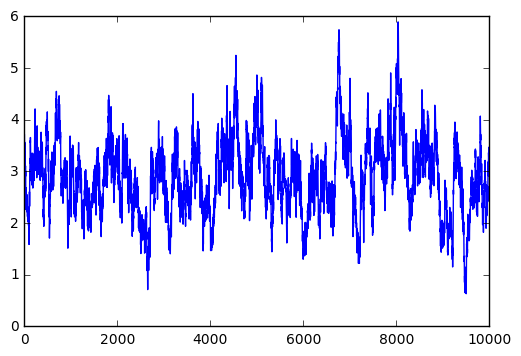

In [222]:
plt.plot(intensity)

1.06287474663


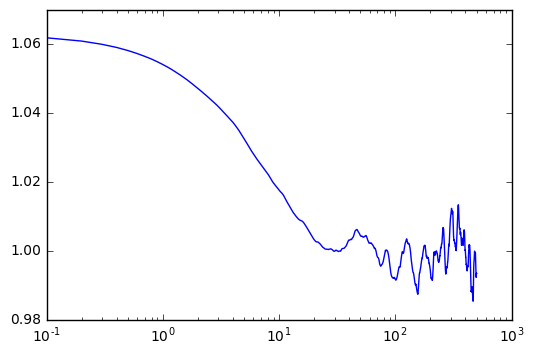

In [223]:
# calculate autocorrelation function
f = np.fft.rfft(intensity)
acf = np.fft.irfft(f * np.conjugate(f))
acf = np.fft.fftshift(acf) / length
autocorr = acf[int(length/2):]/intensity.mean()**2

t = np.arange(0,int(length/2)*dt,dt)
plt.semilogx(t,autocorr)
print(autocorr[0])

[ 1.7       0.85      0.425     0.2125    0.10625   0.053125]
[-1.04509364  0.7847384 ]


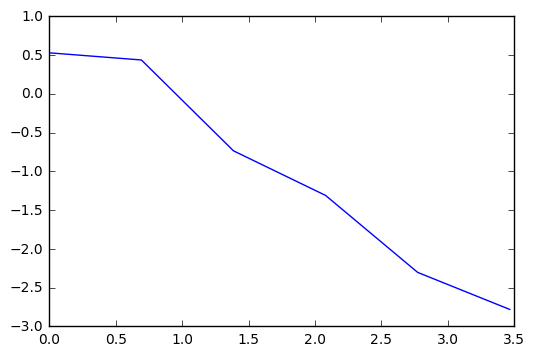

In [230]:
A = np.array([1.7,1.55,0.48,0.27,0.1,0.062])
nn = np.array([1,2,4,8,16,32])
print(1.7/nn)
logA = np.log(A)
lognn = np.log(nn)
plt.plot(lognn,logA)
p = np.polyfit(lognn,logA,1)
print(p)